# Анализа, визуелизација и модели за предвидување на хотелски резервации

### Андреј Станојковиќ 186039

#### Хотелските резервации преку Интернет го променија начинот на кој луѓето го резервираат својот хотелски престој. Со само неколку кликови, патниците можат да ги споредат цените, квалитетот и локацијата на хотелите ширум светот и да направат резервација без воопшто да ги напуштат своите домови. Овие резервации може да се направат преку веб-страницата на хотелот, веб-страница за патување или дури и преку мобилна апликација. Практичноста и пристапноста на онлајн хотелските резервации го олеснија планирањето на патување од кога било, а изобилството на опции им овозможува на патниците да го најдат совршениот хотел за нивниот буџет и преференци.

## Претпроцесирање

#### Целта на претpпроцесирањето е да се трансформираат необработените влезни податоци во соодветен формат за понатамошна анализа. Чекорите во претпроцесирањето на податоци вклучуваат спојување на податоци од повеќе извори, чистење на податоците за да се отстранат непотребни и дупликат набљудувања, и избирање карактеристики кои се релевантни за процесот на податочно рударење. Поради многуте начини на кои може да се собираат и складираат податоците, нивното претпроцесирање е можеби најнапорниот и најдолгиот чекор во целокупниот процес на откривање на знаењето.

In [408]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import scipy
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from kneed import KneeLocator

plt.rcParams['figure.figsize'] = [15, 8]

#### Податочното множество кое е од интерес на овој проект содржи 36 275 хотелски резервации и 19 карактеристики кои ги опишуваат тие резервации.
- Booking_ID - уникатна ознака на резервацијата
- no_of_adults - број на возрасни
- no_of_children - број на деца
- no_of_weekend_nights - број на ноќевања (за време на викенд)
- no_of_week_nights - број на ноќевања (за време на работна недела)
- type_of_meal_plan - тип на оброк
- required_car_parking_space - дали е потребно паркинг место
- room_type_reserved - тип на соба (вредностите се енкодирани од страна на компанијата
- lead_time - број на денови помеѓу резервацијата и датумот на пристигнување
- arrival_year - година на пристигнување
- arrival_month - месец на пристигнување
- arrival_date - ден на пристигнување
- market_segment_type - ознака на сегментот на пазарот
- repeated_guest - дали клиентот е повторен гостин
- no_of_previous_cancellations - број на претходни резервации кои биле откажани од клиентот
- no_of_previous_bookings_not_canceled - број на претходни резервации кои не биле откажани од клиентот
- avg_price_per_room - просечна цена по ден (во евра)
- no_of_special_requests - број на специјални барања (повисок кат, поглед од собата и сл.)
- booking_status - дали резервацијата била откажана или не

In [409]:
hotel_reservations = pd.read_csv('Hotel Reservations.csv')
hotel_reservations

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


#### Може да забележиме дека вредностите во некои од колоните се во лош формат. На пример, атрибутите required_car_parking_space и repeated_guest можат да бидат 0 и 1, но за полесна анализа подобро е тие да се заменат со No и Yes. Исто така, трите колони кои означуваат датум на пристигнување (година, месеци и ден) може да се спојат во еден атрибут.

In [410]:
hotel_reservations['required_car_parking_space'].replace([0, 1], ['No', 'Yes'], inplace=True)

hotel_reservations_datetime = hotel_reservations[['arrival_year', 'arrival_month', 'arrival_date']]
hotel_reservations_datetime.columns = ['year', 'month', 'day']
hotel_reservations_datetime = pd.to_datetime(hotel_reservations_datetime, errors='coerce')
hotel_reservations.rename(columns={'arrival_year': 'date_of_arrival'}, inplace=True)
hotel_reservations['date_of_arrival'] = hotel_reservations_datetime
hotel_reservations.drop(['arrival_month', 'arrival_date'], axis=1, inplace=True)

hotel_reservations['repeated_guest'].replace([0, 1], ['No', 'Yes'], inplace=True)

hotel_reservations

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,date_of_arrival,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,No,Room_Type 1,224,2017-10-02,Offline,No,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,No,Room_Type 1,5,2018-11-06,Online,No,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,No,Room_Type 1,1,2018-02-28,Online,No,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,No,Room_Type 1,211,2018-05-20,Online,No,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,No,Room_Type 1,48,2018-04-11,Online,No,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,No,Room_Type 4,85,2018-08-03,Online,No,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,No,Room_Type 1,228,2018-10-17,Online,No,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,No,Room_Type 1,148,2018-07-01,Online,No,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,No,Room_Type 1,63,2018-04-21,Online,No,0,0,94.50,0,Canceled


### Missing values

#### Со повик на функцијата info() на податочното множество и врз основа на графикот на дистрибуција на missing values, може да се заклучи дека во истото нема вредности кои недоставуваат.

In [411]:
hotel_reservations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Booking_ID                            36275 non-null  object        
 1   no_of_adults                          36275 non-null  int64         
 2   no_of_children                        36275 non-null  int64         
 3   no_of_weekend_nights                  36275 non-null  int64         
 4   no_of_week_nights                     36275 non-null  int64         
 5   type_of_meal_plan                     36275 non-null  object        
 6   required_car_parking_space            36275 non-null  object        
 7   room_type_reserved                    36275 non-null  object        
 8   lead_time                             36275 non-null  int64         
 9   date_of_arrival                       36238 non-null  datetime64[ns]
 10

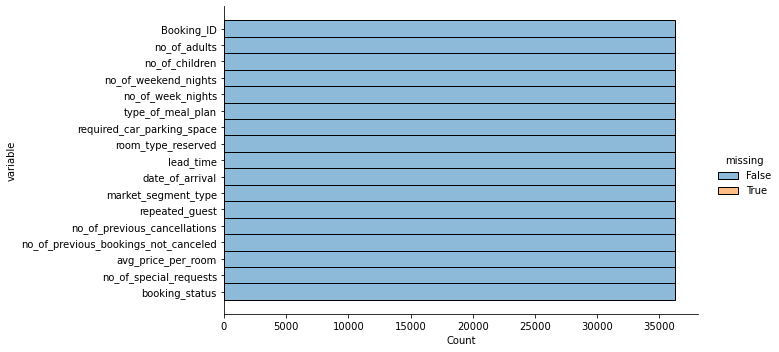

In [412]:
sns.displot(data=hotel_reservations.isna().melt(value_name='missing'), y='variable', hue='missing', color='red', aspect=2);

### Екстремни вредности (Outliers)

#### Outliers се вредности на некој атрибут кои се разликуваат од другите вредности за тој атрибут.  Може да се каже дека тие се аномалии во податочното множество. Со помош на функцијата describe(), може да се видат различни информации за атрибутите. Доколку станува збор за нумерични атрибути, може да ги видиме минималната и максималната вредност, просекот, стандардната девијација и перцентилите. Кај категориските атрибути добиваме информации за број на уникатни вредности на секој атрибут и нивните фреквенции.

In [413]:
hotel_reservations.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,85.232557,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,85.930817,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,17.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,57.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,126.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,443.000000,13.000000,58.000000,540.000000,5.000000


In [414]:
hotel_reservations.describe(include='object')

,Booking_ID,type_of_meal_plan,required_car_parking_space,room_type_reserved,market_segment_type,repeated_guest,booking_status
count,36275,36275,36275,36275,36275,36275,36275
unique,36275,4,2,7,5,2,2
top,INN00001,Meal Plan 1,No,Room_Type 1,Online,No,Not_Canceled
freq,1,27835,35151,28130,23214,35345,24390


#### Еден од полесните начини за забележување на outliers е преку boxplot кој ги прикажува информациите за нумеричките вредности. Доколку се визуелизираат повеќе атрибути во еден boxplot, треба да се внимава нивните вредности да бидат во сличен ранг. Од графиците подолу може да се забележи дека сите нумерички атрибути имаат екстремни вредности. Најмногу има атрибутот за просечна цена на соба кој прима реални вредности.

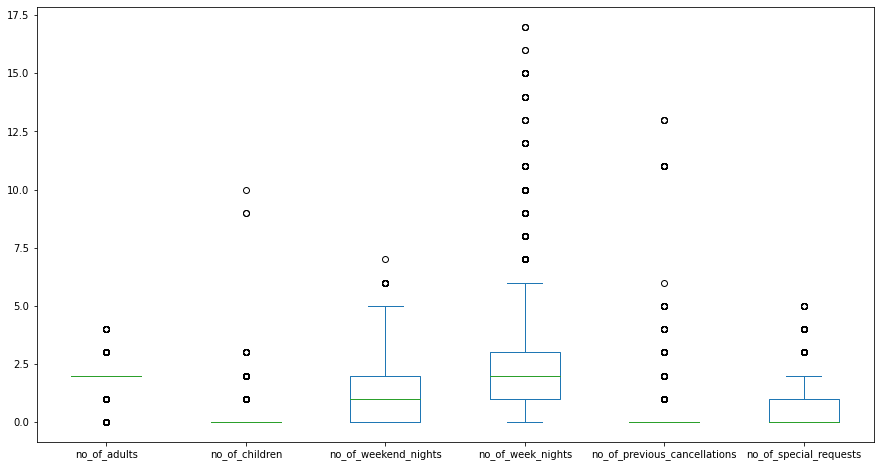

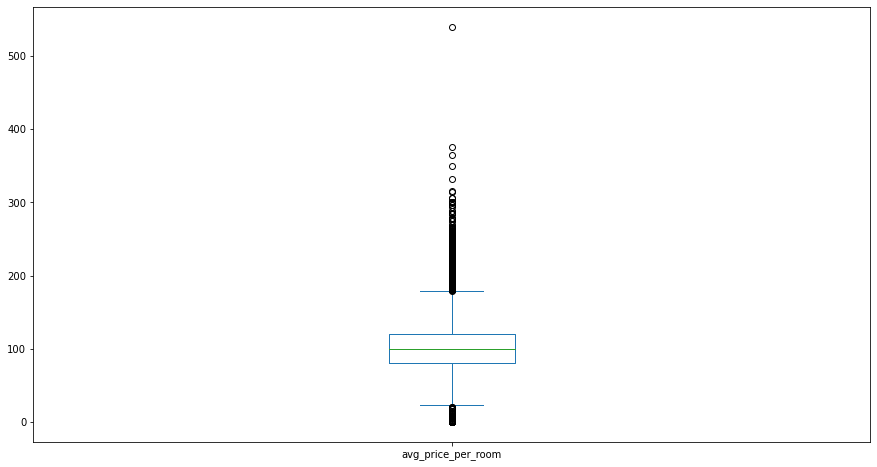

In [415]:
hotel_reservations[['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'no_of_previous_cancellations', 'no_of_special_requests']].plot.box()
hotel_reservations[['avg_price_per_room']].plot.box();

## Визуелизации и EDA

#### Визуелизација на податоци е прикажување на информации во графички или табеларен формат. Успешната визуелизација бара податоците да се претворат во визуелен формат така што нивните карактеристики и односите меѓу атрибутите може да се анализираат. Целта на визуелизација е интерпретација на визуелизираните информации од страна на една личност и формирање на ментален модел на информациите. Употребата на техники за визуелизација во анализата на податоци се нарекува визуелно податочно рударство.

### Бар график

#### Бар графикот овозможува споредување на нумерички вредности како цели броеви и проценти. Тие ја користат должината на секоја лента за да ја претстават вредноста на секоја променлива.

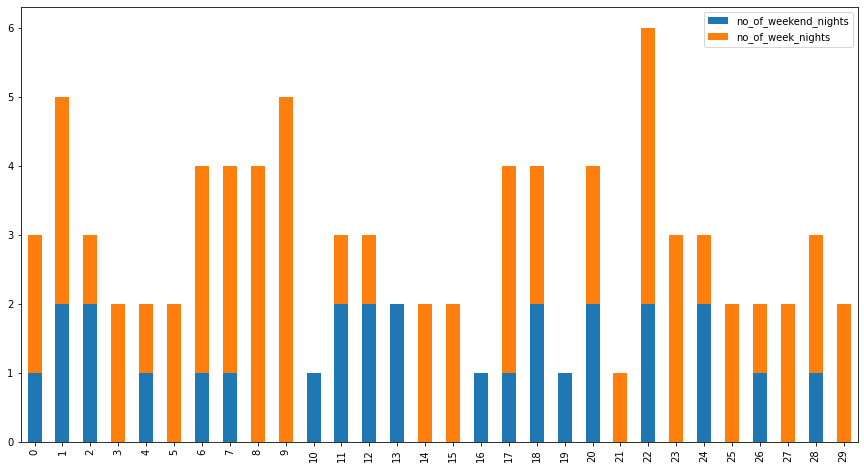

In [416]:
hotel_reservations[['no_of_weekend_nights', 'no_of_week_nights']].head(30).plot.bar(stacked=True);

<AxesSubplot:xlabel='booking_status', ylabel='count'>

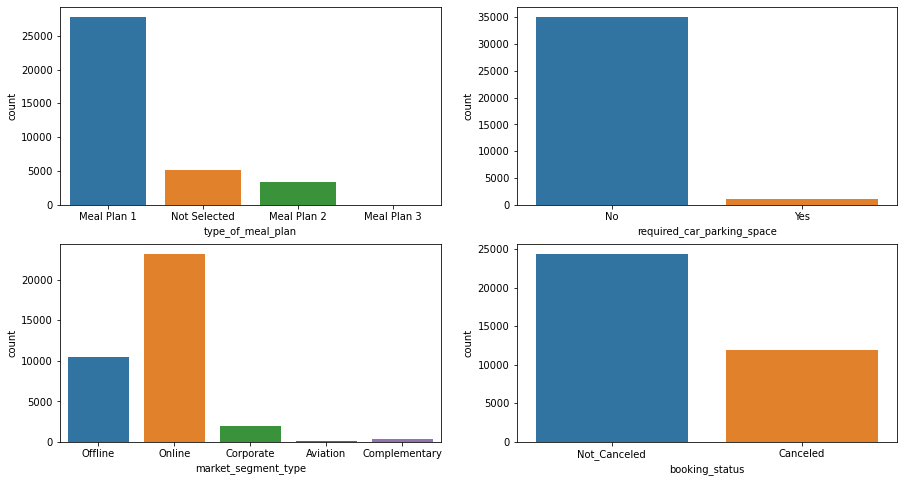

In [417]:
fig, axes = plt.subplots(2, 2)
sns.countplot(x=hotel_reservations['type_of_meal_plan'], ax=axes[0][0])
sns.countplot(x=hotel_reservations['required_car_parking_space'], ax=axes[0][1])
sns.countplot(x=hotel_reservations['market_segment_type'], ax=axes[1][0])
sns.countplot(x=hotel_reservations['booking_status'], ax=axes[1][1])

### Хистограм

#### Хистограм е вид на график кој ја прикажува распределбата на вредностите на атрибутите со доделување на можните вредности во bin-ови и прикажување на бројот на вредности во секој bin. За категорични атрибути, секоја вредност е bin. Ако ова резултира со премногу вредности, тогаш вредностите се комбинираат на некој начин. За континуирани атрибути, опсегот на вредности е поделен на bin-ови, обично со еднаква ширина, и вредностите во секој bin се бројат.

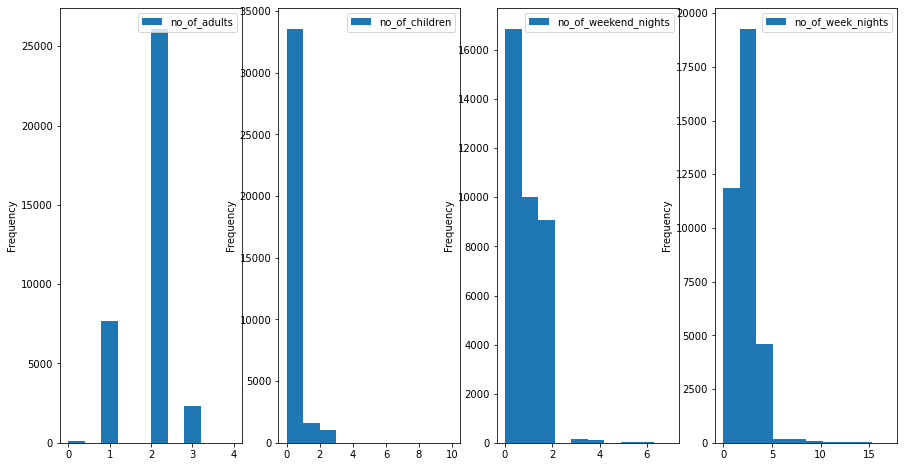

In [418]:
fig, axes = plt.subplots(1, 4)
hotel_reservations[['no_of_adults']].plot.hist(ax=axes[0]);
hotel_reservations[['no_of_children']].plot.hist(ax=axes[1]);
hotel_reservations[['no_of_weekend_nights']].plot.hist(ax=axes[2]);
hotel_reservations[['no_of_week_nights']].plot.hist(ax=axes[3]);

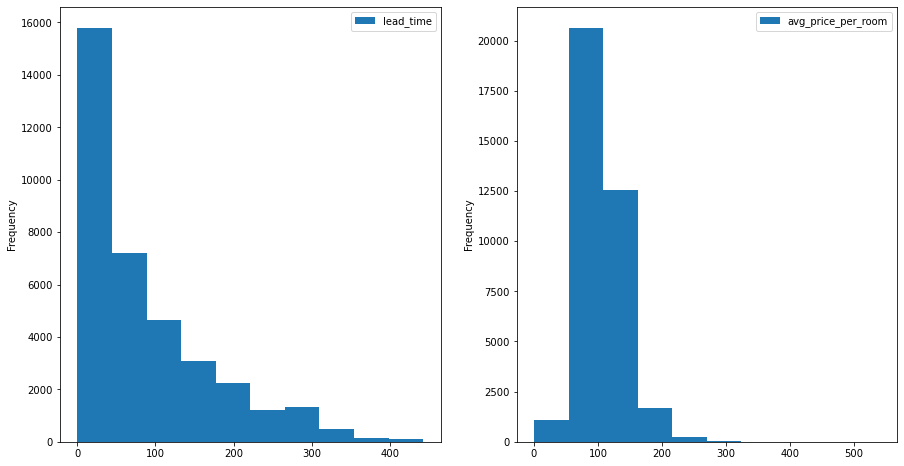

In [419]:
fig, axes = plt.subplots(1, 2)
hotel_reservations[['lead_time']].plot.hist(ax=axes[0]);
hotel_reservations[['avg_price_per_room']].plot.hist(ax=axes[1]);

### Пита график

#### Пита график е сличен на хистограм, но обично се користи со категорични атрибути кои имаат мал број на вредности. Наместо да ја прикажуваат релативната фреквенција на различни вредности преку плоштина или висина на лента како во хистограм, пита графикот ја користи релативната површина на кругот за да покаже релативна фреквенција.

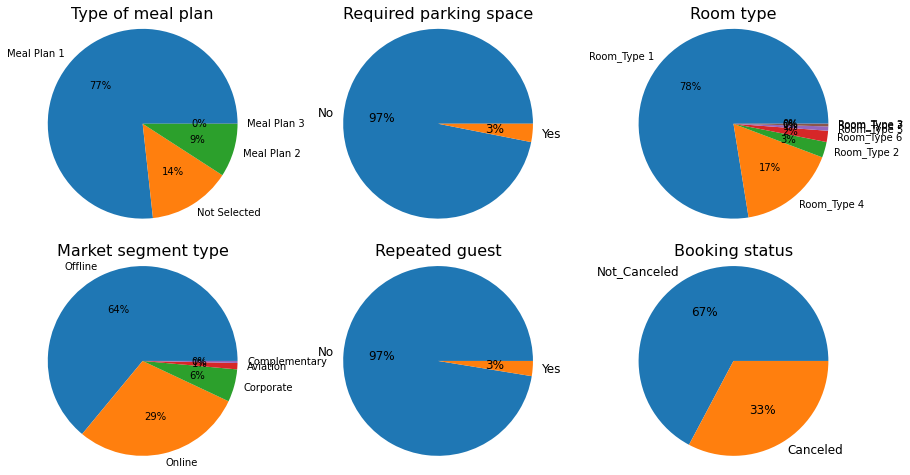

In [420]:
fig, axes = plt.subplots(2, 3)

axes[0][0].pie(hotel_reservations['type_of_meal_plan'].value_counts(), labels=hotel_reservations['type_of_meal_plan'].unique(), autopct='%1.0f%%', radius=1.2)
axes[0][0].set_title('Type of meal plan', fontsize=16)

axes[0][1].pie(hotel_reservations['required_car_parking_space'].value_counts(), labels=hotel_reservations['required_car_parking_space'].unique(), autopct='%1.0f%%', radius=1.2, textprops={'size': 'larger'})
axes[0][1].set_title('Required parking space', fontsize=16)

axes[0][2].pie(hotel_reservations['room_type_reserved'].value_counts(), labels=hotel_reservations['room_type_reserved'].unique(), autopct='%1.0f%%', radius=1.2)
axes[0][2].set_title('Room type', fontsize=16)

axes[1][0].pie(hotel_reservations['market_segment_type'].value_counts(), labels=hotel_reservations['market_segment_type'].unique(), autopct='%1.0f%%', radius=1.2)
axes[1][0].set_title('Market segment type', fontsize=16)

axes[1][1].pie(hotel_reservations['repeated_guest'].value_counts(), labels=hotel_reservations['repeated_guest'].unique(), autopct='%1.0f%%', radius=1.2, textprops={'size': 'larger'})
axes[1][1].set_title('Repeated guest', fontsize=16)

axes[1][2].pie(hotel_reservations['booking_status'].value_counts(), labels=hotel_reservations['booking_status'].unique(), autopct='%1.0f%%', radius=1.2, textprops={'size': 'larger'})
axes[1][2].set_title('Booking status', fontsize=16)

plt.show()

### Scatter plot

#### Scatter plot користи точки за да ги претстави вредностите за две различни нумерички променливи. Податоците се прикажуваат како множество на точки, од кои секоја има вредност на една променлива која ја одредува позицијата на хоризонталната оска и вредност на другата променлива која ја одредува позицијата на вертикалната оска. Главната цел на scatter plot е да се визуелизира врската помеѓу две нумерички променливи и со тоа да се одреди степенот на нивната линеарна зависност.

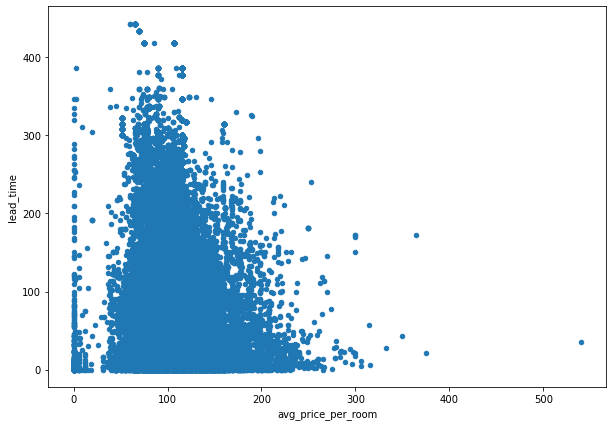

In [421]:
hotel_reservations.plot.scatter(x='avg_price_per_room', y='lead_time', figsize=(10,7));

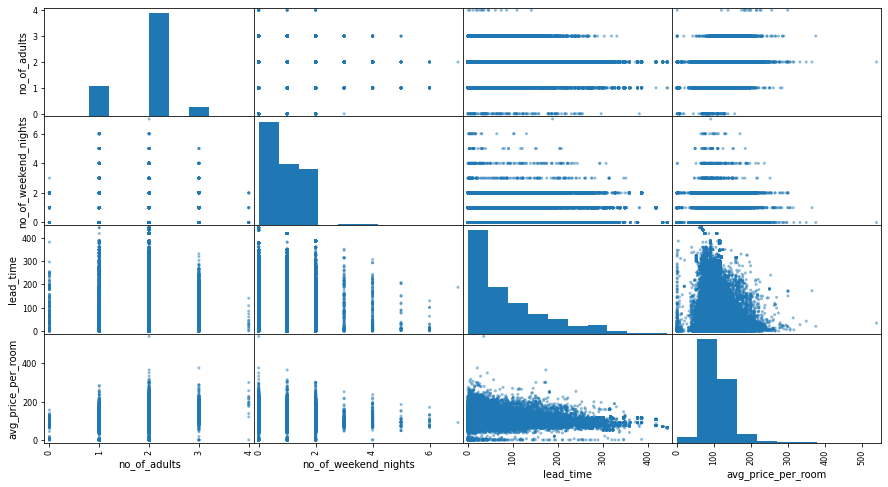

In [422]:
scatter_matrix(hotel_reservations[['no_of_adults', 'no_of_weekend_nights', 'lead_time', 'avg_price_per_room']]);

### Heatmap

#### Heatmap е графичко претставување на податоци во дводимензионален простор каде густината на податочните точки се претставува преку бои. Вообичаено се користи за визуелизација на јачината на врската помеѓу повеќе променливи каде со посветли и потемни нијанси се претставуваат пониски и повисоки вредности. Во графикот подолу се користи Pearson-ов метод за да се одреди корелацијата помеѓу променливите.

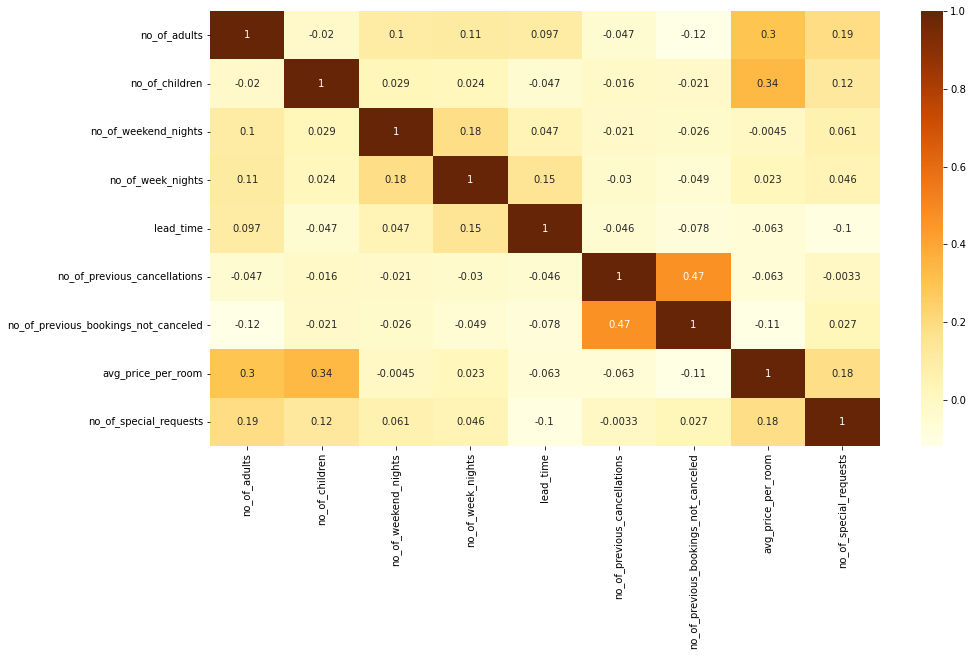

In [423]:
sns.heatmap(hotel_reservations.corr(), cmap='YlOrBr', annot=True);

####  Во наредните два графика се користат Spearman-ов и Kendall-ов метод кои се различни од Pearson-овиот. За разлика од Pearson-овиот метод кој ја наоѓа линеарната зависност помеѓу две променливи, овие два методи ја прикажуваат монотоната зависност помеѓу две променливи која може да биде квадратна и сл.

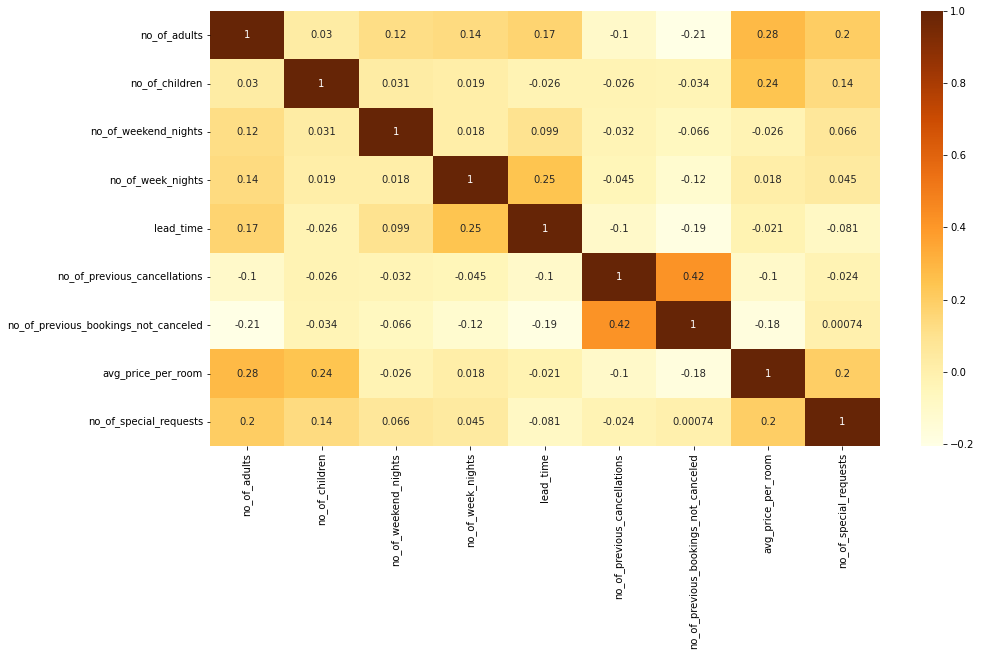

In [424]:
sns.heatmap(hotel_reservations.corr(method='spearman'), cmap='YlOrBr', annot=True);

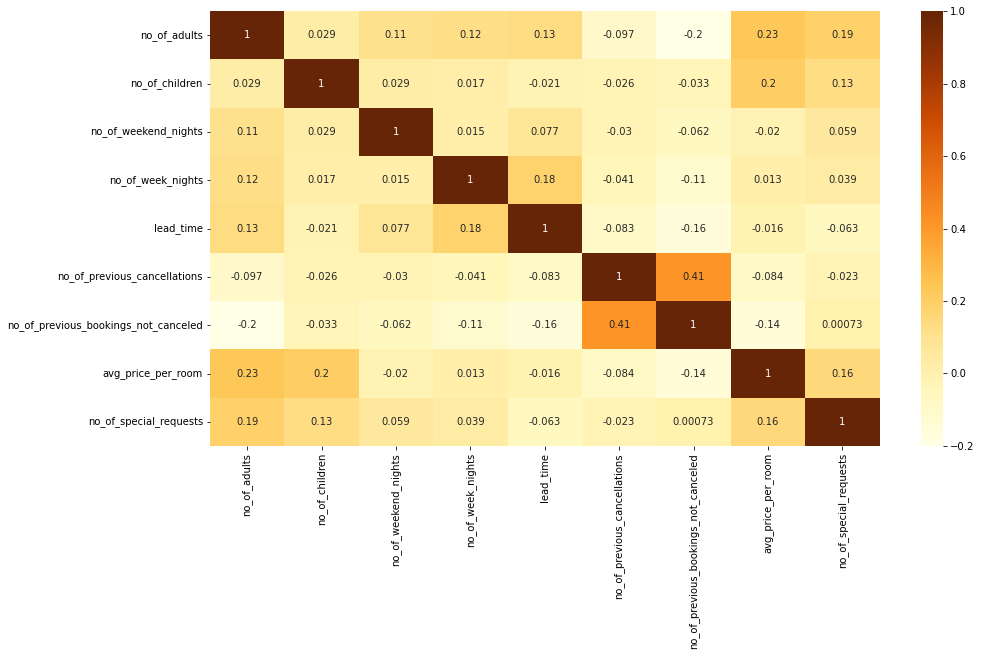

In [425]:
sns.heatmap(hotel_reservations.corr(method='kendall'), cmap='YlOrBr', annot=True);

#### Според графиците може да се заклучи дека сите три методи даваат слични резултати за зависностите помеѓу променливите од ова податочно множество. Најголема меѓусебна зависност имаат променливите кои означуваат колку од претходните резервации се и не се откажани, како и просечната цена по соба која зависи од бројот на возрасни и деца.

### Q-Q график

#### Q–Q график (quantile-quantile график) е графички метод за споредување на две распределби на веројатност со исцртување на нивните квантили еден против друг. Точката (x, y) одговара на еден од квантилите на втората дистрибуција (y-координата) нацртана во однос на истиот квантил од првата дистрибуција (x-координата). Ако двете дистрибуции што се споредуваат се слични, точките во Q–Q графикот приближно ќе лежат на правата y = x. Ако дистрибуциите се линеарно поврзани, точките ќе лежат на права, која не мора да е y = x.

C:\Users\Andrej\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\Andrej\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\Andrej\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\Andrej\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt

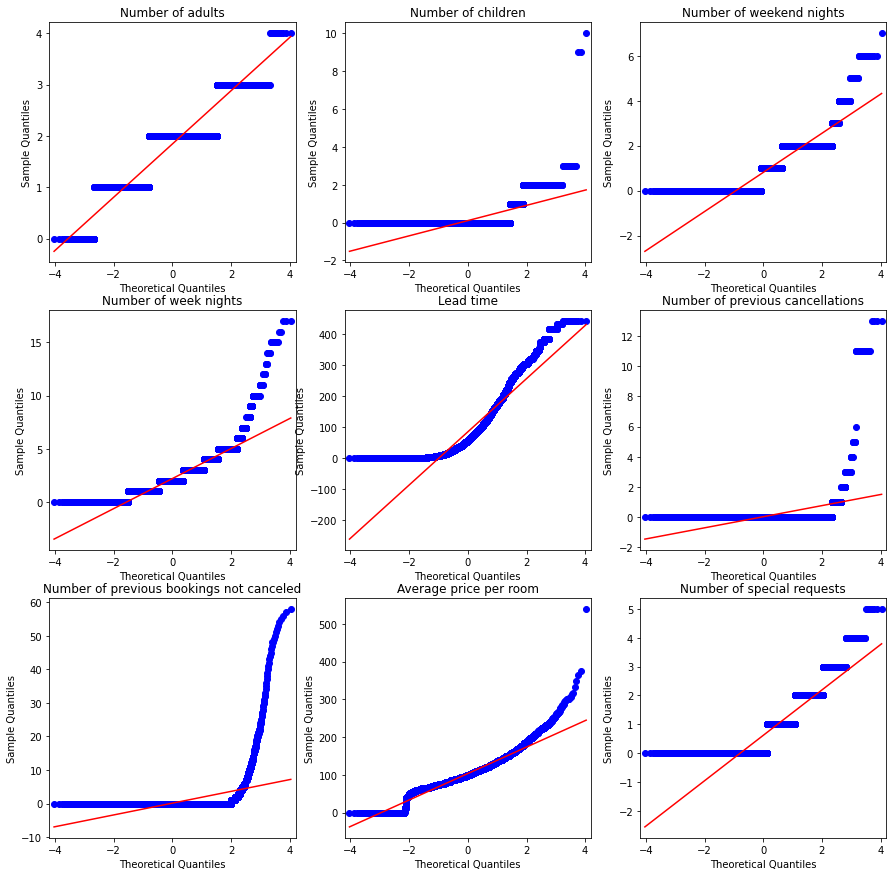

In [426]:
plt.rcParams['figure.figsize'] = [15, 15]
fig, axes = plt.subplots(3, 3)

sm.qqplot(hotel_reservations['no_of_adults'], line='s', ax=axes[0][0]);
axes[0][0].set_title('Number of adults')

sm.qqplot(hotel_reservations['no_of_children'], line='s', ax=axes[0][1]);
axes[0][1].set_title('Number of children')

sm.qqplot(hotel_reservations['no_of_weekend_nights'], line='s', ax=axes[0][2]);
axes[0][2].set_title('Number of weekend nights')

sm.qqplot(hotel_reservations['no_of_week_nights'], line='s', ax=axes[1][0]);
axes[1][0].set_title('Number of week nights')

sm.qqplot(hotel_reservations['lead_time'], line='s', ax=axes[1][1]);
axes[1][1].set_title('Lead time')

sm.qqplot(hotel_reservations['no_of_previous_cancellations'], line='s', ax=axes[1][2]);
axes[1][2].set_title('Number of previous cancellations')

sm.qqplot(hotel_reservations['no_of_previous_bookings_not_canceled'], line='s', ax=axes[2][0]);
axes[2][0].set_title('Number of previous bookings not canceled')

sm.qqplot(hotel_reservations['avg_price_per_room'], line='s', ax=axes[2][1]);
axes[2][1].set_title('Average price per room')

sm.qqplot(hotel_reservations['no_of_special_requests'], line='s', ax=axes[2][2]);
axes[2][2].set_title('Number of special requests')

plt.rcParams['figure.figsize'] = [15, 8]

## Скалирање

### Нормализација

#### Нормализација е техника на скалирање во која податочните вредности се менуваат и рескалираат со цел да бидат во опсег од 0 до 1. Оваа техника е позната и како мин-макс скалирање. Нормализацијата се користи кога податоците не се од нормална распределба. Може да биде корисна во оние алгоритми кои не претпоставуваат никаква дистрибуција на податоци, како K-Nearest Neighbors и невронски мрежи. Од Q-Q графиците може да се забележи дека ниту еден атрибут не доаѓа од нормална распределба, освен атрибутот кој означува број на возрасни.

In [427]:
hotel_reservations_scaled = hotel_reservations.copy()
hotel_reservations_scaled.drop(['Booking_ID', 'date_of_arrival'], axis=1, inplace=True)
min_max_scaler = MinMaxScaler()
hotel_reservations_scaled[['no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']] = min_max_scaler.fit_transform(hotel_reservations_scaled[['no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']])

### Стандардизација

#### Стандардизација е процес на трансформирање на променливите за да имаат средна вредност 0 и стандардна девијација 1. Ова овозможува променливите со различни опсези и распределби да се споредуваат и комбинираат на заедничка скала. Стандардизирањето на променливата се врши со одземање на средната вредност од секое набљудување и потоа делење со стандардната девијација. Резултантната стандардизирана променлива, го претставува бројот на стандардни отстапувања на секое набљудување од средната вредност. Стандардизацијата се користи кога податоците следат нормална распределба. Може да се користи во алгоритми кои прават претпоставка за дистрибуцијата на податоци (пр. линеарна регресија). За разлика од нормализацијата, стандардизацијата нема граничен опсег и не зависи од минималните, максималните и екстремните вредности.

In [428]:
standard_scaler = StandardScaler()
hotel_reservations_scaled[['no_of_adults']] = standard_scaler.fit_transform(hotel_reservations_scaled[['no_of_adults']])

In [429]:
hotel_reservations_scaled[['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest', 'booking_status']] = hotel_reservations_scaled[['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest', 'booking_status']].apply(LabelEncoder().fit_transform)
hotel_reservations_scaled

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0.298893,0.0,0.142857,0.117647,0,0,0,0.505643,3,0,0.0,0.0,0.120370,0.0,1
1,0.298893,0.0,0.285714,0.176471,3,0,0,0.011287,4,0,0.0,0.0,0.197556,0.2,1
2,-1.628975,0.0,0.285714,0.058824,0,0,0,0.002257,4,0,0.0,0.0,0.111111,0.0,0
3,0.298893,0.0,0.000000,0.117647,0,0,0,0.476298,4,0,0.0,0.0,0.185185,0.0,0
4,0.298893,0.0,0.142857,0.058824,3,0,0,0.108352,4,0,0.0,0.0,0.175000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,2.226761,0.0,0.285714,0.352941,0,0,3,0.191874,4,0,0.0,0.0,0.310741,0.2,1
36271,0.298893,0.0,0.142857,0.176471,0,0,0,0.514673,4,0,0.0,0.0,0.168426,0.4,0
36272,0.298893,0.0,0.285714,0.352941,0,0,0,0.334086,4,0,0.0,0.0,0.182204,0.4,1
36273,0.298893,0.0,0.000000,0.176471,3,0,0,0.142212,4,0,0.0,0.0,0.175000,0.0,0


In [430]:
plt.rcParams['figure.figsize'] = [10, 8]

## Класификација

#### Класификација е процес на категоризација на дадено множество на податоци во различни класи или категории врз основа на одредени карактеристики својствени за податоците. Моделот е обучен со веќе класифицирани податочни точки и неговата цел е да ја идентификува класата за нови точки на податоци. Целта на класификацијата е да се научи врската помеѓу карактеристиките на податоците и нивните соодветни ознаки за класи, така што моделот може точно да ја предвиди класата на нови невидени точки на податоци.

In [431]:
x_train, x_test, y_train, y_test = train_test_split(hotel_reservations_scaled.iloc[:, :-1], hotel_reservations_scaled.iloc[:, -1])

### Дрва на одлучување (Decision trees)

#### Дрво на одлучување е модел на машинско учење што користи структура слична на дрво за да прави предвидувања. Работи со рекурзивно делење на податоците во подмножества врз основа на вредностите на влезните карактеристики. Дрвото се конструира со донесување низа одлуки на секој внатрешен јазол, каде што целта е да се идентификува карактеристиката што најдобро ги дели податоците на подмножества кои се што е можно почисти во однос на целната променлива. Поделбите продолжуваат додека не се достигне критериумот за запирање, како што е минималниот број примероци во листот или максималната длабочина на дрвото. Конечните листови на дрвото ги претставуваат предвидените вредности на класата за целната променлива. Дрвата за одлучување можат да се справат со категорични и нумерички карактеристики, што ги прави погодни за различни задачи, вклучувајќи класификација и регресија.

In [432]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
result = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
result

,actual,predicted
22119,0,0
16876,0,0
33673,1,0
3739,1,1
29686,0,0
...,...,...
6953,1,1
33730,1,1
8380,1,1
21647,1,1


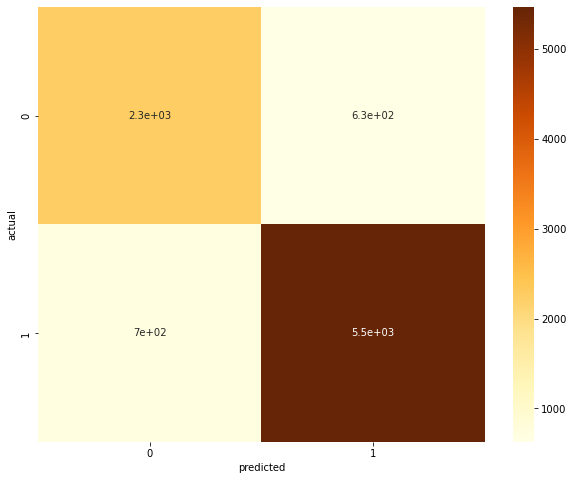

In [433]:
confussion_matrix = pd.crosstab(result.actual, result.predicted)
sns.heatmap(confussion_matrix, cmap='YlOrBr', annot=True);

In [434]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred)}')

Accuracy: 0.8531260337413166
Precision: 0.8969816272965879
Recall: 0.8859364873622813
F1 score: 0.8914248451255299


### Random Forest

#### Random Forest е алгоритам за машинско учење кој се користи за класификација и за регресија. Тој комбинира повеќе индивидуални дрва на одлучување за да пресмета конечно предвидување. Секое дрво на одлука е изградено од случајни примероци од податоците и случајно подмножество на карактеристики. Идејата зад ова е да се создадат разновидни дрва кои можат да доловат различни зависности во податоците. За време на предвидувањето, Random Forest ги собира предвидувањата на секое поединечно дрво за да го пресмета конечното предвидување, или со земање на мнозинството гласови (класификација) или со земање на просекот на предвидувањата (регресија). Ова може да доведе до подобрени перформанси и намалено преоптоварување во споредба со едно дрво на одлука.

In [435]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
result = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
result

,actual,predicted
22119,0,1
16876,0,0
33673,1,1
3739,1,1
29686,0,0
...,...,...
6953,1,1
33730,1,1
8380,1,1
21647,1,1


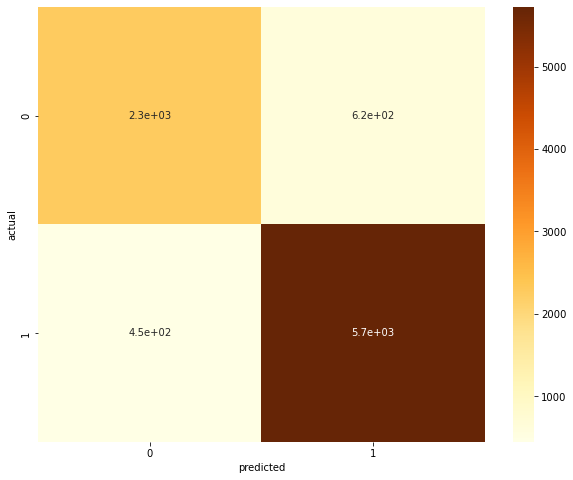

In [436]:
confussion_matrix = pd.crosstab(result.actual, result.predicted)
sns.heatmap(confussion_matrix, cmap='YlOrBr', annot=True);

In [437]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred)}')

Accuracy: 0.8822361892160105
Precision: 0.9022698612862547
Recall: 0.9274141283214518
F1 score: 0.9146692233940555


### Naive Bayes

#### Naive Bayes е веројатносен модел за машинско учење кој се заснова на Баесовата теорема и се користи за класификација. „Наивната“ претпоставка на Naive Bayes е дека карактеристиките се независни од класата, што значи дека присуството или отсуството на една карактеристика не зависи од присуството или отсуството на друга карактеристика. И покрај оваа претпоставка, Naive Bayes алгоритмите добро функционираат во пракса, особено за проблеми со класификација на текст. Постојат различни варијанти на Naive Bayes, вклучувајќи ги Gaussian Naive Bayes, Multinomial Naive Bayes и Bernoulli Naive Bayes, од кои секој прави различни претпоставки за распределбата на карактеристиките дадени во класата.

In [438]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train.squeeze())
y_pred = naive_bayes.predict(x_test)
result = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
result

,actual,predicted
22119,0,0
16876,0,0
33673,1,0
3739,1,0
29686,0,0
...,...,...
6953,1,0
33730,1,0
8380,1,0
21647,1,0


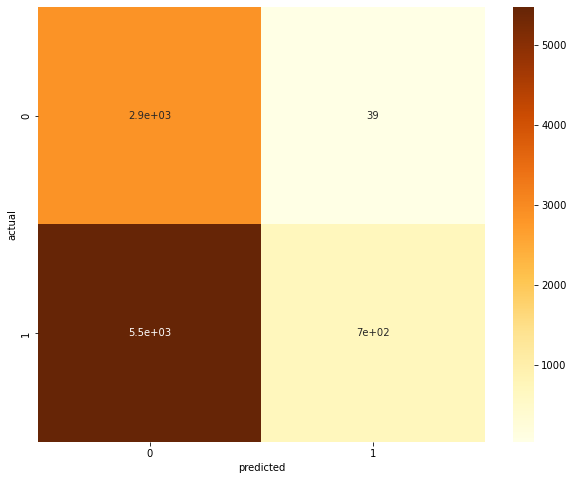

In [439]:
confussion_matrix = pd.crosstab(result.actual, result.predicted)
sns.heatmap(confussion_matrix, cmap='YlOrBr', annot=True);

In [440]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred)}')

Accuracy: 0.3924357702061969
Precision: 0.9472972972972973
Recall: 0.11357744653272846
F1 score: 0.20283564814814817


### K-Nearest Neighbors (KNN)

#### K-Nearest Neighbors (KNN) е алгоритам за машинско учење кој се користи за проблеми со класификација и регресија. Тој е едноставен, непараметриски метод кој прави предвидувања за нов примерок врз основа на неговите најблиски соседи во податоците за тренирање. За секој нов примерок, алгоритамот го пресметува растојанието помеѓу него и сите примероци во тренирачкото множество користејќи метрика за растојание како Евклидово растојание. Потоа, ги избира најблиските K примероци и ги користи за да направи предвидување. За класификација, предвидувањето се заснова на мнозинската класа меѓу K најблиските соседи. За регресија, предвидувањето се пресметува како просечната вредност на целната променлива меѓу K најблиските соседи. Главната предност на KNN е неговата едноставност и интерпретабилност, бидејќи бара многу малку време за обука и не прави претпоставка за дистрибуцијата на податоците. Сепак, тоа може да биде пресметковно скапо и да бара многу меморија, особено за големи множества на податоци.

In [441]:
k_neighbors = KNeighborsClassifier(n_neighbors=5)
k_neighbors.fit(x_train, y_train)
y_pred = k_neighbors.predict(x_test)
result = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
result

,actual,predicted
22119,0,1
16876,0,0
33673,1,1
3739,1,1
29686,0,0
...,...,...
6953,1,1
33730,1,1
8380,1,1
21647,1,0


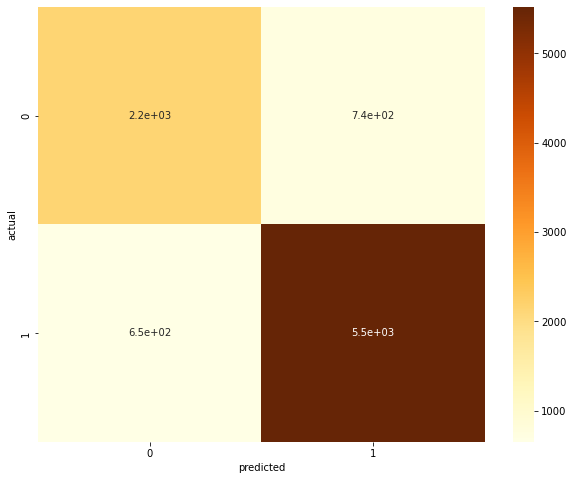

In [442]:
confussion_matrix = pd.crosstab(result.actual, result.predicted)
sns.heatmap(confussion_matrix, cmap='YlOrBr', annot=True);

In [443]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred)}')

Accuracy: 0.8461792920939464
Precision: 0.8812450119712689
Recall: 0.8945236552171095
F1 score: 0.8878346868215807


Text(0, 0.5, 'Mean Error')

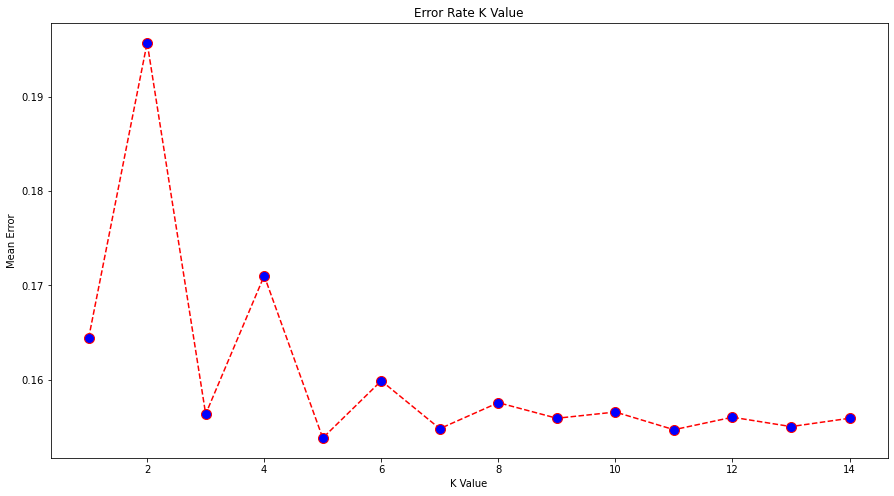

In [444]:
error = []

for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train.ravel())
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(15,8))
plt.plot(range(1, 15), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### Логистичка регресија

#### Логистичка регресија е алгоритам што се користи за проблеми со бинарна класификација, каде целната променлива може да земе само две вредности. Го моделира односот помеѓу множеството независни променливи и веројатноста за позитивна класа. Моделот на логистичка регресија го трансформира излезот од линеарна равенка која ги пресликува влезните карактеристики во вредност помеѓу 0 и 1, што ја претставува проценетата веројатност на позитивната класа. Штом моделот ќе се истренира, може да се користи за да се прават предвидувања за нови податоци со внесување на вредностите за атрибутите во линеарната равенка и примена на логистичката функција.

In [445]:
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(x_train, y_train)
y_pred = logistic_regression.predict(x_test)
result = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
result

,actual,predicted
22119,0,1
16876,0,1
33673,1,1
3739,1,1
29686,0,0
...,...,...
6953,1,1
33730,1,1
8380,1,1
21647,1,0


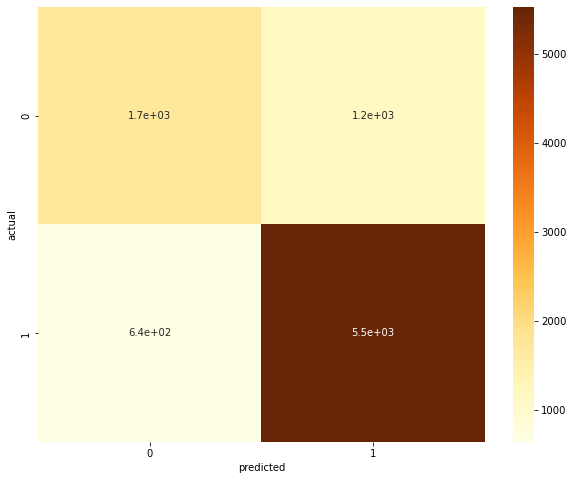

In [446]:
confussion_matrix = pd.crosstab(result.actual, result.predicted)
sns.heatmap(confussion_matrix, cmap='YlOrBr', annot=True);

In [447]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred)}')

Accuracy: 0.7990958209284376
Precision: 0.8241430700447094
Recall: 0.8959818535320804
F1 score: 0.8585623350411428


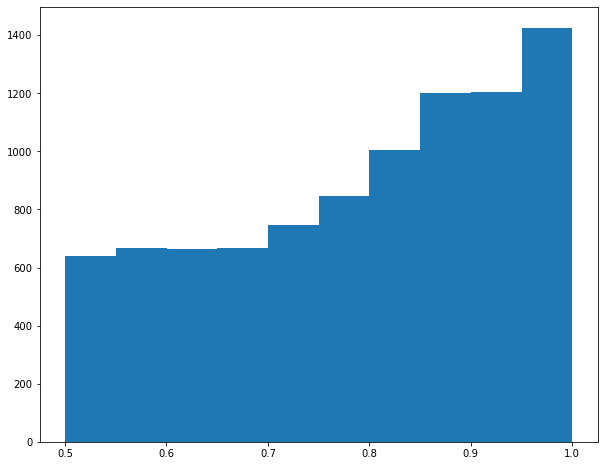

In [448]:
y_pred_proba = logistic_regression.predict_proba(x_test)
plt.hist([max(x) for x in y_pred_proba]);

#### Моделите за класификација предвидуваат дали една резервација е откажана или не. Од добиените резултати може да се заклучи дека најдобри резултати даваат моделите Decision Tree (85% точност), Random Forest (88% точност), K-Nearest Neighbors (84% точност) и логистичка регресија (80% точност), додека најслаб е моделот на Naive Bayes кој дава точност од 39%.

## Регресија

#### Регресија е статистички метод кој се користи во машинското учење за да се предвиди вредноста на континуирана променлива (зависна променлива) врз основа на една или повеќе независни променливи. Целта на регресијата е да се најде односот помеѓу независните и зависните атрибути и да се изгради математички модел кој може да се користи за да се направат предвидувања на нови, невидени податоци. Регресионите модели имаат различни примени, вклучувајќи предвидување, анализа на трендови и сл.

In [449]:
hotel_reservations_scaled['avg_price_per_room'] = hotel_reservations['avg_price_per_room']
x_train, x_test, y_train, y_test = train_test_split(hotel_reservations_scaled.drop(['avg_price_per_room'], axis=1), hotel_reservations_scaled['avg_price_per_room'])

### Линеарна регресија

#### Линеарна регресија е модел кој се користи за моделирање на линеарната врска помеѓу зависна променлива и една или повеќе независни променливи. Се користи за да се направат предвидувања за очекуваната вредност на зависната променлива врз основа на вредностите на независните променливи. Во едноставна линеарна регресија, постои една независна променлива, а односот помеѓу зависните и независните променливи се моделира со помош на права линија. Моделот на линеарна регресија ги проценува параметрите на линијата кои најдобро одговараат на податоците, врз основа на критериум како што е минимизирање на просечната квадратна грешка помеѓу предвидените и вистинските вредности на зависната променлива. Откако моделот е трениран, може да се користи за да се предвидат нови примери со внесување на нивните вредности во равенката на правата.

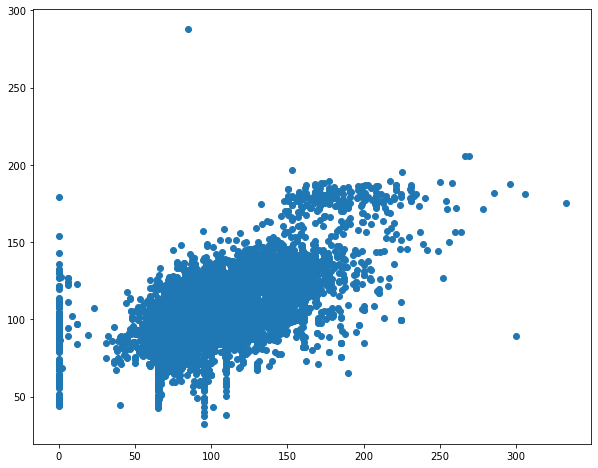

In [450]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
y_pred = linear_regression.predict(x_test)
plt.scatter(y_test, y_pred);

In [451]:
print(f'Mean absolute error: {mean_absolute_error(y_test, y_pred)}')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred))}')

Mean absolute error: 20.54792651102939
Mean squared error: 764.7285446820684
Root mean squared error: 27.653725692609097


### Lasso регресија

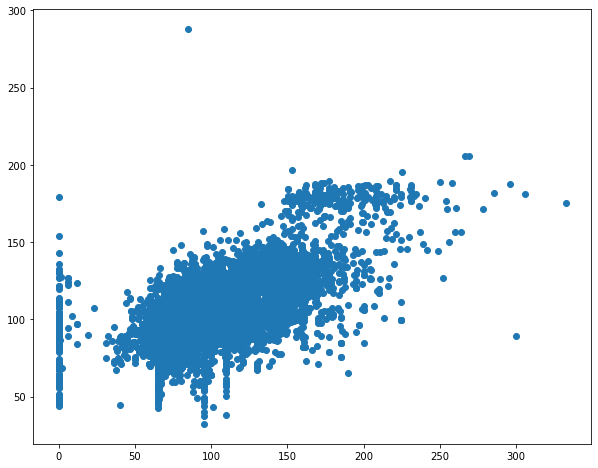

In [452]:
lasso = Lasso(alpha=0.0001)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
plt.scatter(y_test, y_pred);

In [453]:
print(f'Mean absolute error: {mean_absolute_error(y_test, y_pred)}')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred))}')

Mean absolute error: 20.547888460079477
Mean squared error: 764.7284104525703
Root mean squared error: 27.65372326563948


### Ridge регресија

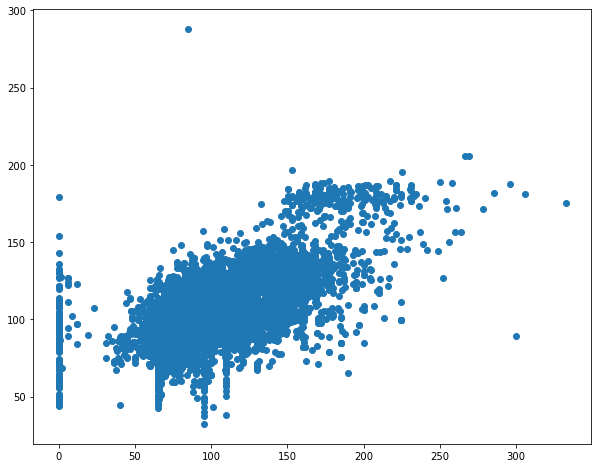

In [454]:
ridge = Ridge(alpha=0.0001)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
plt.scatter(y_test, y_pred);

In [455]:
print(f'Mean absolute error: {mean_absolute_error(y_test, y_pred)}')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred))}')

Mean absolute error: 20.547926304668938
Mean squared error: 764.728522917757
Root mean squared error: 27.6537252990941


### K-Nearest Neighbors (KNN)

In [469]:
k_neighbors = KNeighborsRegressor(n_neighbors=5)
k_neighbors.fit(x_train, y_train)
y_pred = k_neighbors.predict(x_test)
result = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
result

,actual,predicted
359,95.00,85.400
32460,133.00,143.970
17353,56.16,67.446
18483,94.50,95.540
35533,89.25,96.180
...,...,...
33666,114.30,110.960
32073,101.50,104.500
12510,90.95,104.806
12173,231.00,202.790


In [470]:
print(f'Mean absolute error: {mean_absolute_error(y_test, y_pred)}')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred))}')

Mean absolute error: 14.525661484176865
Mean squared error: 491.54321130797223
Root mean squared error: 22.170773809408914


Text(0, 0.5, 'Mean Error')

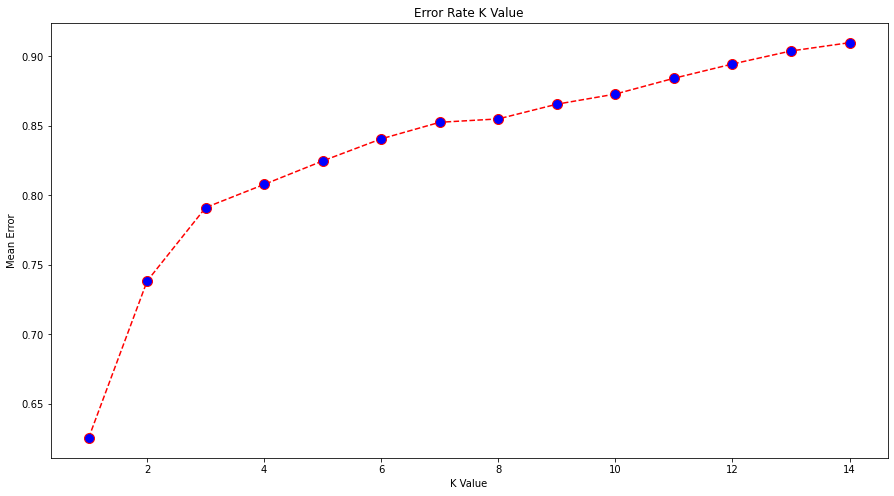

In [458]:
error = []

for i in range(1, 15):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train.ravel())
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(15,8))
plt.plot(range(1, 15), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#### Во моделите за регресија се предвидува колку е просечната цена по соба, која е континуална вредност. Моделите за линеарна регресија, Lasso и Ridge имаат средна апсолутна грешка од 20, додека кај моделот на K-Nearest Neighbors оваа грешка е 14.5 и останува околу 14 доколку се смени бројот на соседи. Може да се заклучи дека повеќето модели даваат големи грешки, но најдобар е моделот на K-Nearest Neighbors.

## Кластерирање

#### Кластерирање е вид на ненадгледувано учење во областа на машинско учење и податочно рударство. Задачата е да се подели множеството на податоци во групи, наречени кластери, така што објектите во секој кластер се послични еден на друг отколку на оние во другите кластери. Целта е да се најде структура во податоците што може да се користи за понатамошна анализа или да се добие увид во зависностите меѓу објектите во множеството податоци. Вообичаените алгоритми за кластерирање се K-Means, Hierarchical clustering и кластерирање базирано на густина (DBSCAN). 

### K-Means

#### K-Means е алгоритам за кластерирање кој го дели множеството од податоци во k кластери, така што збирот на квадратните растојанија помеѓу податочните точки и центроидот на кластерот во кој припаѓаат е минимизиран. Центарот на кластерот е средната вредност на точките кои припаѓаат на тој кластер. Алгоритмот започнува со k случајно избрани почетни центроиди, а потоа итеративно го доделува секој податок во кластерот со најблискиот центроид и ги ажурира центроидите за да бидат средна вредност на новоформираните кластери. Алгоритмот го повторува овој процес додека нема повеќе доделувања или додека не се постигне максимален број итерации. K-Means е чувствителен на првичното поставување на центроиди.

In [471]:
pca = PCA(n_components=2)
hotel_reservations_pca = pca.fit(hotel_reservations_scaled).transform(hotel_reservations_scaled)

In [472]:
def k_means(data, n_clusters):
    k_means = KMeans(n_clusters=n_clusters, max_iter=50, random_state=1)
    k_means.fit(data)
    labels = k_means.labels_
    centroids = k_means.cluster_centers_
    pd.DataFrame(centroids)
    
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels)
    sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker='*', color='g', s=500)
    plt.show()

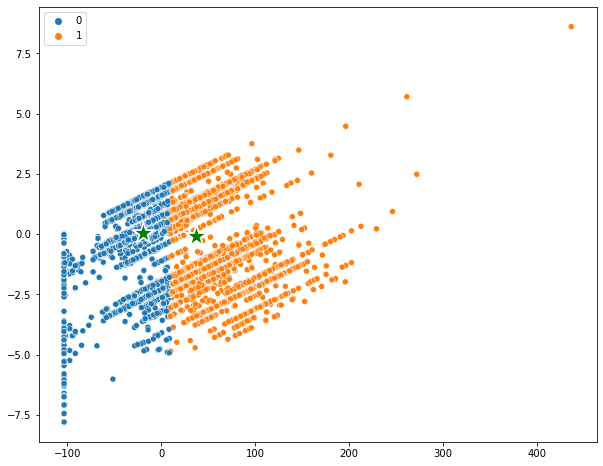

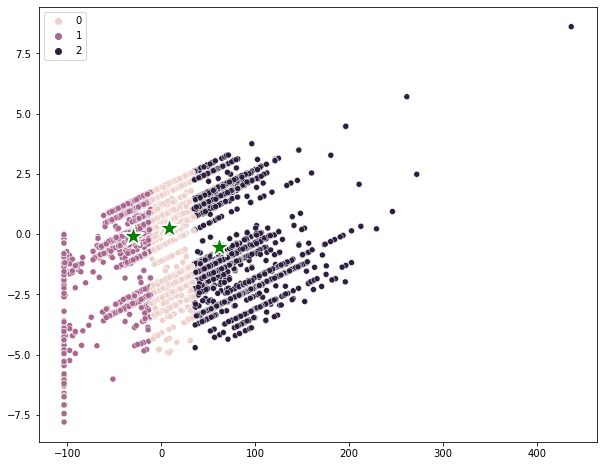

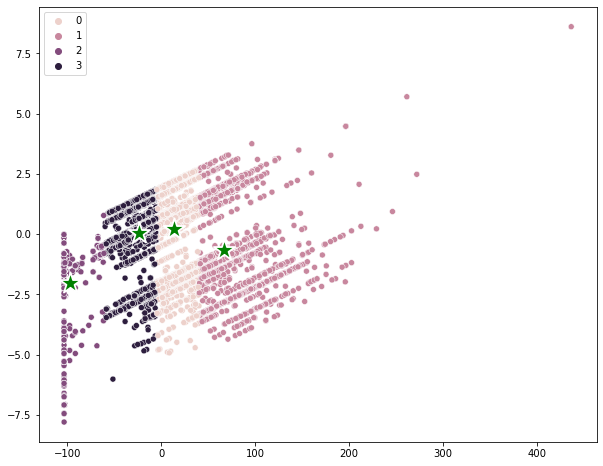

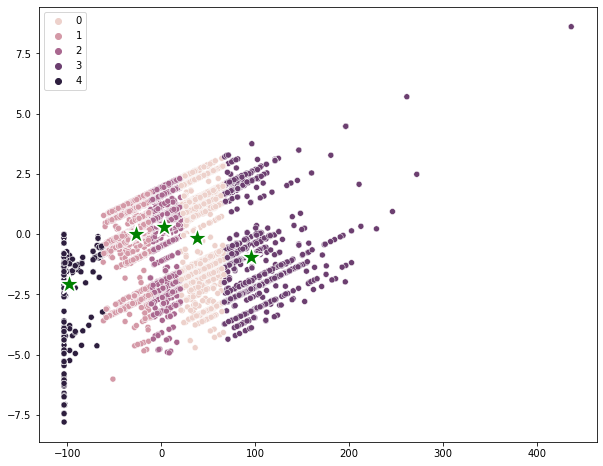

In [473]:
for i in range(2, 6):
    k_means(hotel_reservations_pca, i)

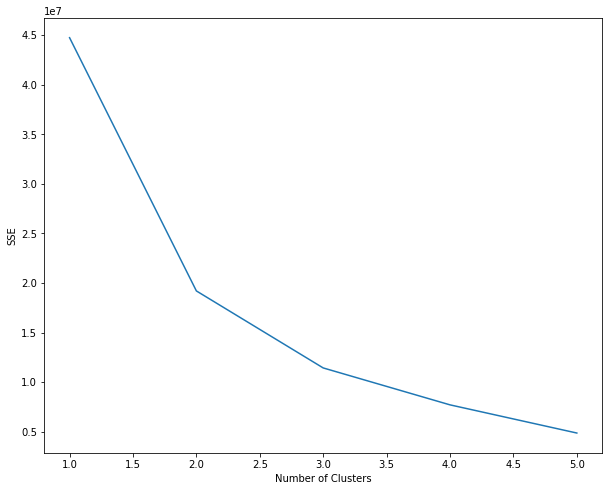

In [474]:
numClusters = 6
SSE, silhouette_coefficients = [], []

for k in range(1, numClusters):
    k_means = KMeans(n_clusters=k)
    k_means.fit(hotel_reservations_pca)
    SSE.append(k_means.inertia_)
    if k <= 1:
        continue
    score = silhouette_score(hotel_reservations_pca, k_means.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(1, numClusters), SSE);
plt.xlabel('Number of Clusters');
plt.ylabel('SSE');

In [475]:
knee_locator = KneeLocator(range(1, numClusters), SSE, curve='convex', direction='decreasing')
knee_locator.elbow

2

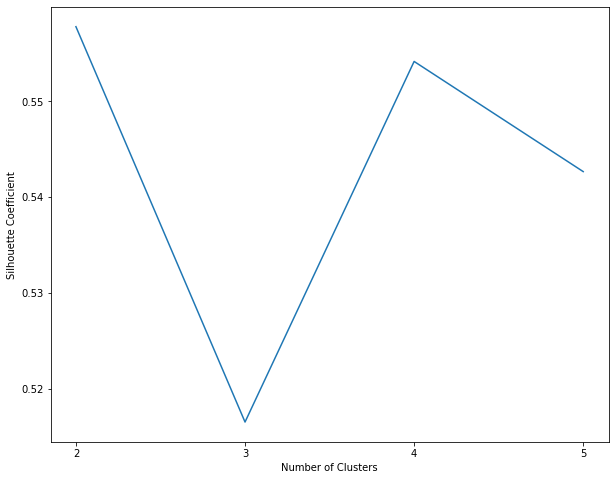

In [476]:
plt.plot(range(2, numClusters), silhouette_coefficients)
plt.xticks(range(2, numClusters))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

### DBSCAN

#### DBSCAN (Density-Based Spatial Clustering of Applications with Noise) е алгоритам за кластерирање базиран на густина што ги групира точките од податочното множество кои се блиску една до друга врз основа на метрика на растојание, а точките што се изолирани ги означува како outliers. Не бара однапред да се специфицира бројот на кластери и работи на тој начин што дефинира соседство околу секоја податочна точка и групира точки кои се блиску една до друга, притоа игнорирајќи ги ретко населените области. Ова му овозможува на DBSCAN ефикасно да наоѓа кластери со произволна големина и форма.

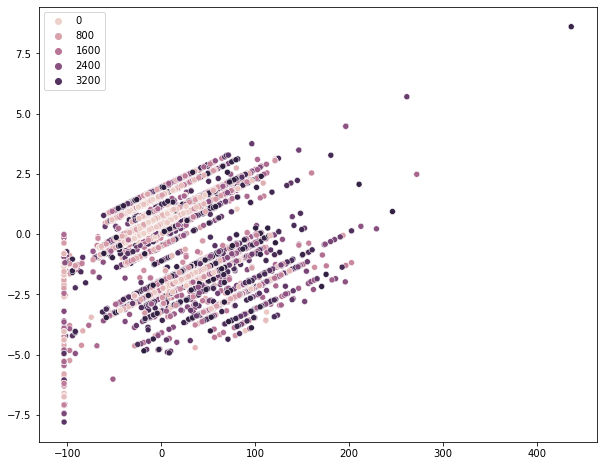

In [477]:
dbscan = DBSCAN(eps=0.1, min_samples=1).fit(hotel_reservations_pca)
sns.scatterplot(x=hotel_reservations_pca[:, 0], y=hotel_reservations_pca[:, 1], hue=dbscan.labels_)
plt.show()

#### 

#### Користена литература:
- https://benwtrent.github.io/2019/04/26/outlier-detection-from-scratch/?fbclid=IwAR1EbNN9uDHqCmIq6_NjVadd1U2cEIHF_2ZHnHg3qpiO9-qoD_HgOd3_Zzk
- https://matplotlib.org/3.3.3/gallery/pie_and_polar_charts/pie_demo2.html#sphx-glr-gallery-pie-and-polar-charts-pie-demo2-py
- https://datavizpyr.com/visualizing-missing-data-with-seaborn-heatmap-and-displot/#:~:text=The%20key%20function%20for%20both,for%20the%20NOT%20missing%20data.
- https://www.tableau.com/data-insights/reference-library/visual-analytics/charts/bar-charts
- https://chartio.com/learn/charts/what-is-a-scatter-plot/#:~:text=What%20is%20a%20scatter%20plot,to%20observe%20relationships%20between%20variables.
- https://towardsdatascience.com/q-q-plots-explained-5aa8495426c0
- https://towardsdatascience.com/normalization-vs-standardization-explained-209e84d0f81e
- Tan, P., Steinbach, M. & Kumar, V. (2014). Introduction to Data Mining. Pearson Education Limited.